In [1]:
import pandas as pd
import numpy as np

In [2]:
# data = "https://archive.ics.uci.edu/static/public/222/bank+marketing.zip"
# !python -m wget $data

In [3]:
df = pd.read_csv("bank+marketing/bank/bank-full.csv", sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df = df.drop(["default", "loan"], axis=1)

df.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.isna().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
df.dtypes

age           int64
job          object
marital      object
education    object
balance       int64
housing      object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

### No. 1

In [8]:
df.education.value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

### No. 2

In [10]:
df["y"] = (df.y == "yes").astype(int)
df["y"]

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int32

In [11]:
df.y.value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

I want to know how many records from the dataframe

In [13]:
df.shape

(45211, 15)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [16]:
df_train, df_valid = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [17]:
len(df_train), len(df_valid), len(df_test)

(27126, 9042, 9043)

In [18]:
df_train = df_train.reset_index(drop=True)
df_valid = df_valid.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [19]:
df_train

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,32,technician,single,tertiary,1100,yes,cellular,11,aug,67,1,-1,0,unknown,0
1,38,entrepreneur,married,secondary,0,yes,cellular,17,nov,258,1,-1,0,unknown,0
2,49,blue-collar,married,secondary,3309,yes,cellular,15,may,349,2,-1,0,unknown,0
3,37,housemaid,married,primary,2410,no,cellular,4,aug,315,1,-1,0,unknown,0
4,31,self-employed,married,tertiary,3220,no,cellular,26,aug,74,4,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27121,27,services,single,secondary,167,no,cellular,8,jul,606,2,-1,0,unknown,0
27122,40,technician,single,tertiary,693,no,cellular,30,jan,427,1,-1,0,unknown,0
27123,54,technician,divorced,secondary,0,yes,unknown,16,may,161,1,-1,0,unknown,0
27124,25,services,single,secondary,2311,no,cellular,21,jul,1105,2,-1,0,unknown,1


In [20]:
y_train = df_train.y.values
y_valid = df_valid.y.values
y_test = df_test.y.values

In [21]:
y_train

array([0, 0, 0, ..., 0, 1, 0])

In [22]:
del df_train["y"]
del df_valid["y"]
del df_test["y"]

In [23]:
df_full_train = df_full_train.reset_index(drop=True)
df_full_train

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,41,blue-collar,married,primary,849,yes,unknown,15,may,72,1,-1,0,unknown,0
1,49,technician,married,primary,1415,yes,cellular,30,jul,269,2,-1,0,unknown,0
2,42,admin.,married,secondary,3842,no,cellular,31,jul,130,4,-1,0,unknown,0
3,37,management,single,tertiary,-119,yes,unknown,11,jun,375,11,-1,0,unknown,0
4,56,blue-collar,married,primary,3498,no,cellular,15,apr,264,2,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36163,44,housemaid,single,primary,1059,no,unknown,18,jun,2093,1,-1,0,unknown,1
36164,23,student,single,tertiary,508,no,cellular,8,sep,210,1,92,1,failure,0
36165,34,technician,divorced,tertiary,1317,yes,cellular,15,may,239,1,-1,0,unknown,0
36166,33,retired,married,secondary,165,no,unknown,7,may,111,1,-1,0,unknown,0


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
numerical = ["age", "balance", "day", "duration", "campaign", "pdays", "previous"]

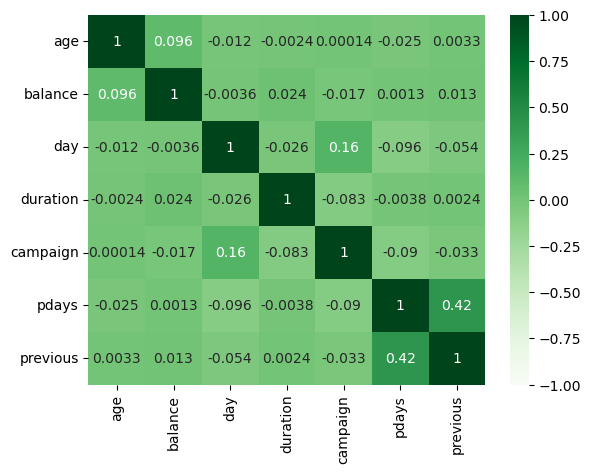

In [26]:
corr = df_train[numerical].corr()

axis_corr = sns.heatmap(corr, annot=True, vmin=-1, vmax=1, cmap="Greens")
plt.show()

### No. 3

In [28]:
from sklearn.metrics import mutual_info_score

In [29]:
categorical = ["job", "marital", "education", "housing", "contact", "month", "poutcome"]
df_train[categorical].head()

,job,marital,education,housing,contact,month,poutcome
0,technician,single,tertiary,yes,cellular,aug,unknown
1,entrepreneur,married,secondary,yes,cellular,nov,unknown
2,blue-collar,married,secondary,yes,cellular,may,unknown
3,housemaid,married,primary,no,cellular,aug,unknown
4,self-employed,married,tertiary,no,cellular,aug,unknown


In [30]:
df.dtypes

age           int64
job          object
marital      object
education    object
balance       int64
housing      object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int32
dtype: object

In [31]:
def mutual_info_y_score(series):
    return mutual_info_score(series, y_train)

In [32]:
mi = df_train[categorical].apply(mutual_info_y_score)
mi.sort_values(ascending=False).round(2)

poutcome     0.03
month        0.03
contact      0.01
housing      0.01
job          0.01
education    0.00
marital      0.00
dtype: float64

Because its so hard to see what are the values, so I wrote this without using round to make it easier

In [34]:
mi.sort_values(ascending=False)

poutcome     0.029533
month        0.025090
contact      0.013356
housing      0.010343
job          0.007316
education    0.002697
marital      0.002050
dtype: float64

### No. 4

In [36]:
from sklearn.feature_extraction import DictVectorizer

In [37]:
df_train.dtypes

age           int64
job          object
marital      object
education    object
balance       int64
housing      object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

In [38]:
train_dicts = df_train.to_dict(orient="records")
train_dicts[0]

{'age': 32,
 'job': 'technician',
 'marital': 'single',
 'education': 'tertiary',
 'balance': 1100,
 'housing': 'yes',
 'contact': 'cellular',
 'day': 11,
 'month': 'aug',
 'duration': 67,
 'campaign': 1,
 'pdays': -1,
 'previous': 0,
 'poutcome': 'unknown'}

In [39]:
dv = DictVectorizer(sparse=False)

In [40]:
dv.fit(train_dicts)

DictVectorizer(sparse=False)

In [41]:
dv.get_feature_names_out()

array(['age', 'balance', 'campaign', 'contact=cellular',
       'contact=telephone', 'contact=unknown', 'day', 'duration',
       'education=primary', 'education=secondary', 'education=tertiary',
       'education=unknown', 'housing=no', 'housing=yes', 'job=admin.',
       'job=blue-collar', 'job=entrepreneur', 'job=housemaid',
       'job=management', 'job=retired', 'job=self-employed',
       'job=services', 'job=student', 'job=technician', 'job=unemployed',
       'job=unknown', 'marital=divorced', 'marital=married',
       'marital=single', 'month=apr', 'month=aug', 'month=dec',
       'month=feb', 'month=jan', 'month=jul', 'month=jun', 'month=mar',
       'month=may', 'month=nov', 'month=oct', 'month=sep', 'pdays',
       'poutcome=failure', 'poutcome=other', 'poutcome=success',
       'poutcome=unknown', 'previous'], dtype=object)

In [42]:
X_train = dv.transform(train_dicts)

X_train.shape

(27126, 47)

In [43]:
X_train

array([[3.200e+01, 1.100e+03, 1.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [3.800e+01, 0.000e+00, 1.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [4.900e+01, 3.309e+03, 2.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [5.400e+01, 0.000e+00, 1.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [2.500e+01, 2.311e+03, 2.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [3.000e+01, 1.500e+01, 2.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00]])

In [44]:
valid_dicts = df_valid.to_dict(orient="records")

X_valid = dv.transform(valid_dicts)
X_valid.shape

(9042, 47)

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [47]:
model.predict_proba(X_train)

array([[0.96791645, 0.03208355],
       [0.96635336, 0.03364664],
       [0.93301573, 0.06698427],
       ...,
       [0.99016106, 0.00983894],
       [0.24409825, 0.75590175],
       [0.86642384, 0.13357616]])

In [48]:
y_pred = model.predict(X_valid)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [49]:
deposit_decision = (y_pred >= 0.5)
deposit_decision

array([False, False, False, ..., False, False, False])

In [50]:
deposit_decision.astype(int)

array([0, 0, 0, ..., 0, 0, 0])

In [51]:
y_valid == deposit_decision

array([ True,  True, False, ...,  True,  True, False])

In [52]:
original_accuracy = (y_valid == deposit_decision).mean().round(2)
original_accuracy

0.9

### No. 5

In [54]:
columns_list = df_train.columns.to_list()
columns_list

['age',
 'job',
 'marital',
 'education',
 'balance',
 'housing',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome']

In [55]:
accuracy_without_features = []
min_difference = float("inf")

for features in columns_list:
    all_columns = columns_list.copy()
    all_columns.remove(features)

    dv = DictVectorizer(sparse=False)

    train_dicts = df_train[all_columns].to_dict(orient="records")
    X_train = dv.fit_transform(train_dicts)

    valid_dicts = df_valid[all_columns].to_dict(orient="records")
    X_valid = dv.transform(valid_dicts)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_valid)
    deposit_decision = (y_pred >= 0.5).astype(int)
    accuracy_after_deleted = (y_valid == deposit_decision).mean()

    accuracy_without_features.append(accuracy_after_deleted)

    difference = original_accuracy - accuracy_after_deleted

    if difference < min_difference:
        min_difference = difference
        feature_with_min_diff = features
    
    print(f"Feature is deleted = {features}, with the accuracy = {accuracy_after_deleted} and differences = {difference}")

Feature is deleted = age, with the accuracy = 0.9011280690112807 and differences = -0.001128069011280708
Feature is deleted = job, with the accuracy = 0.9011280690112807 and differences = -0.001128069011280708
Feature is deleted = marital, with the accuracy = 0.900353904003539 and differences = -0.0003539040035389629
Feature is deleted = education, with the accuracy = 0.9007962840079629 and differences = -0.000796284007962833
Feature is deleted = balance, with the accuracy = 0.9011280690112807 and differences = -0.001128069011280708
Feature is deleted = housing, with the accuracy = 0.900575094005751 and differences = -0.0005750940057509535
Feature is deleted = contact, with the accuracy = 0.9007962840079629 and differences = -0.000796284007962833
Feature is deleted = day, with the accuracy = 0.9007962840079629 and differences = -0.000796284007962833
Feature is deleted = month, with the accuracy = 0.8996903339969033 and differences = 0.0003096660030966758
Feature is deleted = duration, 

In [56]:
print(f"Feature with the smallest difference: {feature_with_min_diff}, Minimum Difference = {min_difference}") 

Feature with the smallest difference: age, Minimum Difference = -0.001128069011280708


### No. 6

In [58]:
for C in [0.01,0.1,1,10,100]:

    dv = DictVectorizer(sparse=False)

    train_dicts = df_train.to_dict(orient="records")
    X_train = dv.fit_transform(train_dicts)

    valid_dicts = df_valid.to_dict(orient="records")
    X_valid = dv.transform(valid_dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_valid)
    deposit_decision = (y_pred >= 0.5).astype(int)
    accuracy = (y_valid == deposit_decision).mean().round(3)

    print(f"C = {C}, accuracy = {accuracy}")

C = 0.01, accuracy = 0.898
C = 0.1, accuracy = 0.901
C = 1, accuracy = 0.901
C = 10, accuracy = 0.902
C = 100, accuracy = 0.901
